# This notebook evaluates performance metrics on various combinations of DBSCAN parameters and randomly generated clusters

<font color = Blue>
Intuition:
    
Parameter estimation (eps and minimum samples) for DBSCAN depends on the variance of the input data (along with other factors such as dimensionality of the input). Low variance datasets tend to work well smaller min_samples but high variance input requires relatively larger min_samples.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from itertools import product
import matplotlib.pyplot as plt
import time
plt.rcParams["figure.figsize"] = (10,10)
pd.set_option('display.max_rows', None, 'display.max_columns', None)

## Performance metrics
https://scikit-learn.org/stable/modules/model_evaluation.html

- Silhouette Coefficient = (n - i) / max(n, i)

    n = mean near-cluster distance
    
    i = mean intra-cluster distance
    
    
- Calinkski-Harabasz Index = within-cluster dispersion/ between-cluster dispersion

In [2]:
def initialize_parameters():
    '''
        Returns a list of of all combinations of eps and
        min_samples as tuples.
    '''
    eps_values = list(np.around(np.linspace(0.2, 0.6, num = 20), 2))
    min_samples_values = [20, 25, 30, 35, 40, 45, 50, 55, 60]
    
    return list(product(eps_values, min_samples_values))

In [3]:
def dbscan_parameter_estimation(X, y):
    '''
        Arguments:
            X, input to the DBSCAN model
            
        Creates a DBSCAN model for the given input and
        parameters obtained from initialize_parameter_range.
        
        Returns a pandas df with DBSCAN parameters, number of
        clusters created, and performance metrics -
        silhouette_score and calinkski_harabasz_score
    '''
    
    # Normalize the input 
    X = StandardScaler().fit_transform(X)
    
    # Plot the original clusters
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title('Randomly generated dataset - original clusters')
    plt.show()
    time.sleep(3)
    
    # Initialize parameters for DBSCAN
    
    param_ini = initialize_parameters()
    param_est = pd.DataFrame(columns = ['params', 'num_clusters', 'silhouette_score', 'ch_score'])
    row = pd.DataFrame(columns = param_est.columns)
    i = 0
    l = len(param_ini)
    for param in param_ini:
        i+=1
        #print('Progress: {}%'.format(i*100/l), end = '\r')
        y_pred = DBSCAN(eps = param[0], min_samples = param[1]).fit_predict(X)
        row.at[0, 'params'] = list(param)
        row['num_clusters'] = len(np.unique(y_pred))
        try : 
            row['silhouette_score'] = metrics.silhouette_score(X, y_pred)
            row['ch_score'] = metrics.calinski_harabasz_score(X, y_pred)
        except :
            pass
        param_est = param_est.append(row, ignore_index = True)
        
    return param_est

In [4]:
def dbscan_pred(X, best_param):
    '''
        Arguments:
            X, input to the DBSCAN model
            best_param, best vlaues of eps and min_samples decided 
                        by dbscan_parameter_estimation
                        
        Plots the predicted clusters and prints the number of outliers
    '''
    
    y_pred = DBSCAN(eps = best_param[0], min_samples = best_param[1]).fit_predict(X)
    plt.title('Clusters determined by DBSCAN')
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'Paired')
    plt.show()
    time.sleep(3)
    print('Number of outliers:', list(y_pred).count(-1))
    
    return 

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]

# Randomly generated dataset with HIGH variance 
X1, y1 = make_blobs(n_samples = 750, centers = centers, cluster_std = 0.5, random_state = 10)

# Randomly generated dataset with LOW variance
X2, y2 = make_blobs(n_samples = 750, centers = centers, cluster_std = 0.2, random_state = 10)

## HIGH variance input data

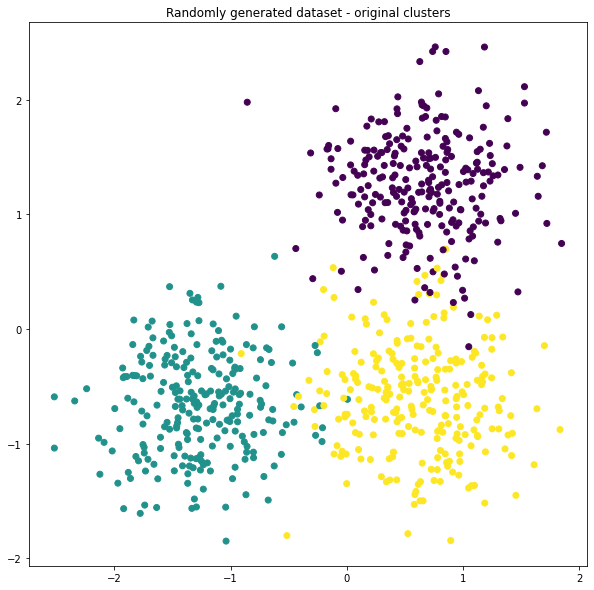

,params,num_clusters,silhouette_score,ch_score
0,"[0.49, 60]",4,0.529273,710.670538
1,"[0.47, 55]",4,0.525101,693.577460
2,"[0.43, 45]",4,0.524363,694.051296
3,"[0.41, 40]",4,0.523231,695.447821
4,"[0.39, 35]",4,0.522368,693.588313
5,"[0.45, 50]",4,0.521980,686.051188
6,"[0.47, 60]",4,0.519977,667.002356
7,"[0.45, 55]",4,0.518884,661.650033
8,"[0.43, 50]",4,0.514071,638.281709
9,"[0.39, 40]",4,0.509283,624.206595


In [6]:
# Parameter estimation for HIGH variance data
p = dbscan_parameter_estimation(X1, y1).sort_values(by = ['silhouette_score', 'ch_score'], ignore_index = True, ascending = False)
best_param = p.loc[0, 'params']
p

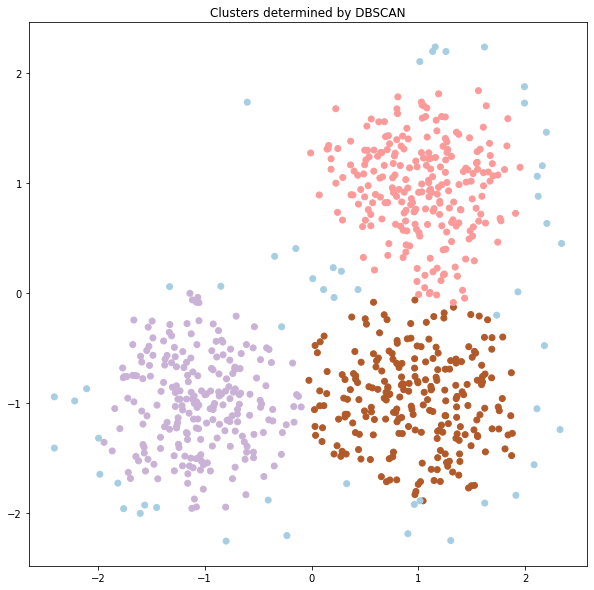

Number of outliers: 52


In [7]:
# Clustering results for HIGH variance data
dbscan_pred(X1, best_param)

## LOW variance input data

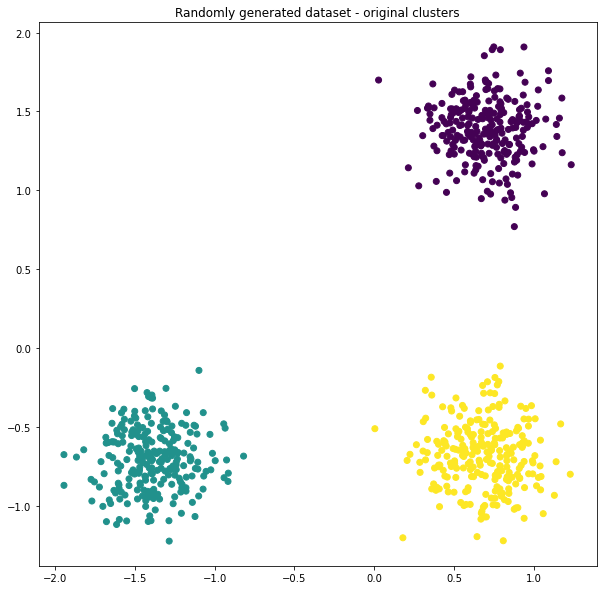

,params,num_clusters,silhouette_score,ch_score
0,"[0.33, 20]",3,0.825715,9155.879589
1,"[0.33, 25]",3,0.825715,9155.879589
2,"[0.33, 30]",3,0.825715,9155.879589
3,"[0.33, 35]",3,0.825715,9155.879589
4,"[0.33, 40]",3,0.825715,9155.879589
5,"[0.33, 45]",3,0.825715,9155.879589
6,"[0.33, 50]",3,0.825715,9155.879589
7,"[0.35, 20]",3,0.825715,9155.879589
8,"[0.35, 25]",3,0.825715,9155.879589
9,"[0.35, 30]",3,0.825715,9155.879589


In [10]:
# Parameter estimation for LOW variance data
p = dbscan_parameter_estimation(X2, y2).sort_values(by = ['silhouette_score', 'ch_score'], ignore_index = True, ascending = False)
best_param = p.loc[0, 'params']
p

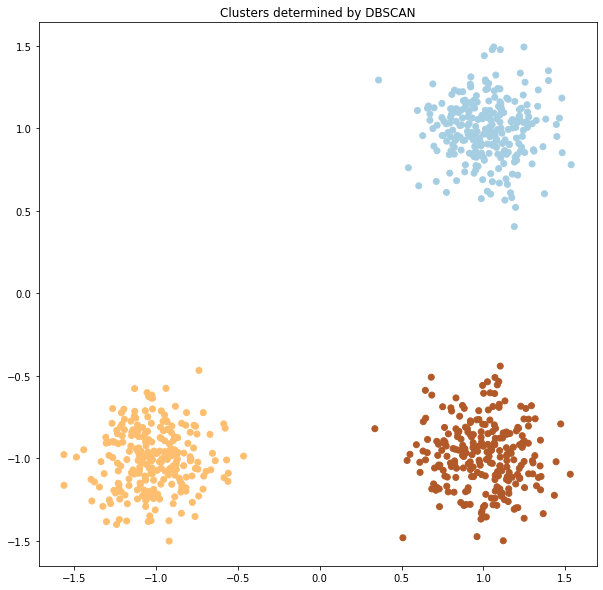

Number of outliers: 0


In [9]:
# Clustering results for LOW variance data
dbscan_pred(X2, best_param)